#### Récupérer les donnes depuis l'API de l'insee (donnees-locale)

In [2]:
import requests
server = "https://api.insee.fr/donnees-locales/V0.1/donnees/"
res = requests.get(f"{server}geo-STOCD@GEO2023RP2020/COM-01004.ALL")
res.status_code

SSLError: HTTPSConnectionPool(host='api.insee.fr', port=443): Max retries exceeded with url: /donnees-locales/V0.1/donnees/geo-STOCD@GEO2023RP2020/COM-01004.ALL (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1007)')))

#### Récupérer les données depuis l'API de l'insee (MELODI)

In [ ]:
import requests
import json

server = "https://api.insee.fr/melodi"
res = requests.get(f"{server}/catalog/all")

for r in res.json():
    print(r["identifier"], r["title"][0]["content"])

DD_CNA_AGREGATS Produit Intérieur Brut (PIB) et grands agrégats économiques
DD_CNA_APU Comptes des administrations publiques
DD_CNA_BRANCHES Activité des branches de l'économie
DD_CNA_CONSO_MENAGES_COICOP Consommation des ménages par fonction
DD_CNA_CONSO_MENAGES_PRODUITS Consommation des ménages par produit
DD_CNA_ECH_EXT Échanges extérieurs
DD_CNA_PATRIMOINE Comptes de patrimoine
DD_CNA_PATRIMOINE_BRANCHES Comptes de patrimoine par branches
DD_CNA_TEE Tableau économique d'ensemble
DD_EEC_ANNUEL Activité, emploi et chômage - résultats annuels 2023
DD_EEC_SERIES Activité, emploi et chômage - séries longues
DS_ANTIPOL Enquête annuelle sur les investissements pour protéger l'environnement (Antipol)
DS_BPE Dénombrement des équipements (commerce, sport, services, santé…)
DS_BPE_EDUCATION Enseignement : dénombrement et caractéristiques des équipements
DS_BPE_EVOLUTION Évolution du nombre d'équipements et services
DS_BPE_SPORT_CULTURE Sport, loisirs et culture : dénombrement, caractéristique

In [ ]:
catalogs_ids = ["DS_ERFS_CHAMP_CONST_SL", "DS_ERFS_INDIVIDU", "DD_EEC_ANNUEL"]

# Afficher les métadonnées liées aux différents 
for cid in catalogs_ids:
    url = f"{server}/catalog/{cid}"
    res = requests.get(url)
    print(res.json())

{'identifier': 'DS_ERFS_CHAMP_CONST_SL', 'uri': 'http://id.insee.fr/catalogues/jeuDeDonnees/b7968a57-5065-4a81-a796-3c3ce4da1a77', 'title': [{'lang': 'fr', 'content': 'Indicateurs de pauvreté et de niveau de vie (séries longues à champ constant)'}, {'lang': 'en', 'content': 'Poverty and living standards indicators (long-term series with a constant scope)'}], 'subtitle': [{'lang': 'fr', 'content': 'Enquête revenu fiscaux et sociaux (ERFS)'}, {'lang': 'en', 'content': 'Enquête revenu fiscaux et sociaux (ERFS)'}], 'description': [{'lang': 'fr', 'content': "Les indicateurs sont calculés au niveau de l'individu.\nLes indicateurs de pauvreté sont les seuils et taux de pauvreté ainsi que le nombre de personnes pauvres (au seuil de 60 %).\nLes indicateurs de niveau de vie sont la médiane et la moyenne, le 1er et 9e décile ainsi que le rapport interdécile (D9/D1).\n\nLe champ comporte les individus vivant en France métropolitaine, appartenant aux ménages ordinaires dont le revenu déclaré est po

In [ ]:
import pandas as pd

res = requests.get(f"{server}/data/{cid}")
data = res.json()

title = data['title']['fr']
identifier = data['identifier']

observations = data["observations"]
extracted_data = []

for obs in observations:
    dimensions = obs["dimensions"]

    if 'attributes' in obs:
        attributes = obs["attributes"]
    else:
        attributes = None

    # Suivant les jeux de données value peut être absent
    if 'value' in obs['measures']['OBS_VALUE_NIVEAU']:
        measures = obs['measures']['OBS_VALUE_NIVEAU']['value']
    else:
        mesures = None

    # on rassemble tout dans un objet
    if 'attributes' in obs:
        combined_data = {**dimensions,**attributes, 'OBS_VALUE_NIVEAU': measures}
    else:
        combined_data = {**dimensions, 'OBS_VALUE_NIVEAU': measures}
    
    extracted_data.append(combined_data)

df = pd.DataFrame(extracted_data)

print(f'Jeu de données : {identifier} \nTitre : {title} ')
print(df)


Jeu de données : DD_EEC_ANNUEL 
Titre : Activité, emploi et chômage - résultats annuels 2023 
    PCS IMMI                    EEC_MEASURE SEX EDUC ANCSORFI2 UNDEREMP  \
0    _T   _T                            EMP   M   _T        _T       _T   
1    _T   _T                         UNEMPB   F   _T        _T       _T   
2    46   _T                            EMP   F   _T        _T       _T   
3    _T   10                          UNEMP  _T   _T        _T       _T   
4    _T   _T  PT_EMPFORM_IN_EMP_BY_ACTIVITY   F   _T        _T       _T   
..   ..  ...                            ...  ..  ...       ...      ...   
995  _T   _T                         ACTPOP  _T  4T5        _T       _T   
996  _T   _T      PT_PCS_IN_EMP_BY_ACTIVITY  _T   _T        _T       _T   
997  _T   _T                       UNDEREMP  _T   _T        _T       _T   
998  10   _T      PT_PCS_IN_EMP_BY_ACTIVITY   F   _T        _T       _T   
999  34   _T           PT_AGE_IN_EMP_BY_PCS  _T   _T        _T       _T   

    E

#### Récupération des données avec `pynsee`

In [ ]:
import pandas as pd
# from pynsee.localdata import get_local_metadata

# metadata = get_local_metadata()
# var_labels = metadata[metadata.DATASET == "RP"].VARIABLES_label_fr.unique().tolist()
# f_var_labels = [l for l in var_labels if "profession" in l or "emploi" in l or "travail" in l ]
# len(f_var_labels), f_var_labels

/home/bsellier/simulateur_conseil_municipal/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(70,
 ['Catégorie socioprofessionnelle regroupée (6 postes)',
  'Activité économique agrégée en 5 postes (NA, 2008) - Catégorie socioprofessionnelle regroupée (6 postes) - Sexe',
  'Activité économique agrégée en 5 postes (NA, 2008) - Catégorie socioprofessionnelle détaillée (29 postes) - Sexe',
  'Sexe - Catégorie socioprofessionnelle regroupée (6 postes)',
  "Sexe - Conditions d'emploi",
  "Statut professionnel détaillé (4 postes) - Âge regroupé en 6 tranches, de moins de 20 ans jusqu'à 65 ans ou plus - Temps de travail - Sexe",
  'Statut professionnel détaillé (4 postes) - Âge quinquennal de moins de 20 ans à 65 ans ou plus - Temps de travail - Sexe',
  "Statut professionnel regroupé (2 postes) - Âge regroupé en 6 tranches, de moins de 20 ans jusqu'à 65 ans ou plus - Temps de travail - Sexe",
  'Statut professionnel regroupé (2 postes) - Âge quinquennal de moins de 20 ans à 65 ans ou plus - Temps de travail - Sexe',
  'Statut professionnel regroupé (2 postes) - Activité économique e

On va s'intéresser aux variables : "Catégorie socioprofessionnelle regroupée (8 postes) - Sexe"

In [2]:
metadata[metadata.VARIABLES_label_fr == "Catégorie socioprofessionnelle regroupée (8 postes) - Sexe"]

,VARIABLES,UNIT,DATASET_VERSION,DATASET,VARIABLES_label_fr,UNIT_label_fr,GEO_DATE,DATA_DATE,DATASET_label_fr
96,CS1_8-SEXE,POP,GEO2021RP2018,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2021.0,2018.0,Recensement de la population
262,CS1_8-SEXE,POP,GEO2020RP2017,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2020.0,2017.0,Recensement de la population
428,CS1_8-SEXE,POP,GEO2019RP2016,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2019.0,2016.0,Recensement de la population
594,CS1_8-SEXE,POP,RP2015,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2017.0,2015.0,Recensement de la population
788,CS1_8-SEXE,POP,RP2014,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2016.0,2014.0,Recensement de la population
1020,CS1_8-SEXE,POP,GEO2021RP2013,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2021.0,2013.0,Recensement de la population
1251,CS1_8-SEXE,POP,RP2013,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2015.0,2013.0,Recensement de la population
1366,CS1_8-SEXE,POP,GEO2020RP2012,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2020.0,2012.0,Recensement de la population
1510,CS1_8-SEXE,POP,RP2012,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2014.0,2012.0,Recensement de la population
1619,CS1_8-SEXE,POP,GEO2019RP2011,RP,Catégorie socioprofessionnelle regroupée (8 po...,Population,2019.0,2011.0,Recensement de la population


In [3]:
from pynsee.localdata import get_nivgeo_list

nivgeo_list = get_nivgeo_list()
nivgeo_list

,NIVGEO,NIVGEO_label_fr,NIVGEO_label_en
0,COM,communes et arrondissements municipaux,municipalities and municipal districts
1,DEP,départements,departments
2,REG,régions,regions
3,METRODOM,France métropolitaine,metropolitan France
4,FE,France,France
5,ARR,arrondissements,districts
6,EPCI,intercommunalités,intermunicipal authorities
7,AAV2020,aires d'attraction des villes 2020,functional areas 2020
8,UU2020,unités urbaines 2020,urban unit 2020
9,ZE2020,zones d'emploi 2020,employment zone 2020


In [4]:
from pynsee.localdata.get_geo_list import get_geo_list

city_list = get_geo_list('communes')
city_list

,TITLE,TYPE,DATECREATION,TITLE_SHORT,CODE,URI,TITLE_REG,CODE_REG,CODE_DEP,TITLE_DEP
0,Les Abymes,Commune,1943-01-01,Abymes,97101,http://id.insee.fr/geo/commune/90272c00-7732-4...,Guadeloupe,01,971,Guadeloupe
1,Anse-Bertrand,Commune,1943-01-01,Anse-Bertrand,97102,http://id.insee.fr/geo/commune/be8710ee-6214-4...,Guadeloupe,01,971,Guadeloupe
2,Baie-Mahault,Commune,1943-01-01,Baie-Mahault,97103,http://id.insee.fr/geo/commune/84b3be9f-f07a-4...,Guadeloupe,01,971,Guadeloupe
3,Baillif,Commune,1943-01-01,Baillif,97104,http://id.insee.fr/geo/commune/f008d6d1-4e05-4...,Guadeloupe,01,971,Guadeloupe
4,Basse-Terre,Commune,1943-01-01,Basse-Terre,97105,http://id.insee.fr/geo/commune/6882f7d3-5560-4...,Guadeloupe,01,971,Guadeloupe
...,...,...,...,...,...,...,...,...,...,...
34870,Zalana,Commune,1976-01-01,Zalana,2B356,http://id.insee.fr/geo/commune/f2e2b9e5-14de-4...,Corse,94,2B,Haute-Corse
34871,Zilia,Commune,1976-01-01,Zilia,2B361,http://id.insee.fr/geo/commune/b472ee1a-11a5-4...,Corse,94,2B,Haute-Corse
34872,Zuani,Commune,1976-01-01,Zuani,2B364,http://id.insee.fr/geo/commune/3c315c87-c066-4...,Corse,94,2B,Haute-Corse
34873,San-Gavino-di-Fiumorbo,Commune,1976-01-01,San-Gavino-di-Fiumorbo,2B365,http://id.insee.fr/geo/commune/f54a6198-9cd7-4...,Corse,94,2B,Haute-Corse


In [5]:
def get_code_from_city(city):
    code = city_list[(city_list["TITLE"] == city) | (city_list["TITLE_SHORT"] == city)]["CODE"]
    if len(code) == 0:
        raise Exception("La commune donnée en entrée n'existe pas")
    return code.iloc[0]


get_code_from_city("Lyon")

'69123'

In [1]:
# from pynsee.localdata import get_local_data
import pandas as pd
# CS1_8_SEXE = get_local_data("CS1_8-SEXE", "GEO2020RP2017", nivgeo="COM", geocodes=['01001'])
CS1_8_SEXE = pd.read_csv("DS_RP_POPULATION_COMP_CSV_FR/DS_RP_POPULATION_COMP_data.csv", sep=";")
CS1_8_SEXE_meta = pd.read_csv("DS_RP_POPULATION_COMP_CSV_FR/DS_RP_POPULATION_COMP_metadata.csv", sep=";")
CS1_8_SEXE["GEO"].astype('string')
CS1_8_SEXE["PCS"].astype('string')
CS1_8_SEXE

/tmp/ipykernel_34047/3213719924.py:4: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  CS1_8_SEXE = pd.read_csv("DS_RP_POPULATION_COMP_CSV_FR/DS_RP_POPULATION_COMP_data.csv", sep=";")


,GEO,GEO_OBJECT,SEX,PCS,AGE,RP_MEASURE,TIME_PERIOD,OBS_VALUE
0,241400555,EPCI,_T,9,Y25T54,POP,2021,718.874270
1,200069060,EPCI,_T,9,Y25T54,POP,2021,435.368710
2,244000766,EPCI,_T,9,Y25T54,POP,2021,363.276240
3,245701271,EPCI,M,9,Y25T54,POP,2021,612.767080
4,243100773,EPCI,M,9,Y25T54,POP,2021,208.730500
...,...,...,...,...,...,...,...,...
9374906,95610,COM,_T,4,Y_GE15,POP,2015,23.905724
9374907,95510,COM,F,4,Y_GE15,POP,2015,39.894531
9374908,95633,COM,_T,7,Y_GE15,POP,2010,11.996776
9374909,95555,COM,_T,_T,Y_GE15,POP,2010,16511.124298


In [11]:
CS1_8_SEXE_meta[CS1_8_SEXE_meta["COD_VAR"] == 'RP_MEASURE']

,COD_VAR,LIB_VAR,COD_MOD,LIB_MOD
13,RP_MEASURE,Mesure du recensement,POP,Population


In [8]:
def get_label_from_code(var_code, meta):
    return meta[meta['COD_VAR'] == var_code]['LIB_VAR'].iloc[0]

def get_geo_label_from_meta(geo_code, meta):
    return meta[(meta['COD_VAR'] == 'GEO') & (meta['COD_MOD'] == geo_code)].iloc[0]
get_geo_label_from_meta('241400555', CS1_8_SEXE_meta)

COD_VAR                                          GEO
LIB_VAR                                   Géographie
COD_MOD                                    241400555
LIB_MOD    Communauté de communes de Bayeux Intercom
Name: 660, dtype: object

In [2]:
CS1_8 = CS1_8_SEXE[(CS1_8_SEXE["GEO_OBJECT"] == "COM")][["GEO", "PCS", "AGE", "OBS_VALUE", "SEX"]]
CS1_8_sorted = CS1_8.sort_values(["GEO", "PCS", "AGE"])
CS1_8_sorted[CS1_8_sorted["GEO"] == 1001]

,GEO,PCS,AGE,OBS_VALUE,SEX
8224727,1001,1,Y25T54,16.082051,_T
8217544,1001,2,Y25T54,4.020513,_T
8231246,1001,3,Y25T54,64.328205,_T
8226885,1001,3,Y_GE55,16.082051,_T
8218533,1001,4,Y15T24,4.020513,_T
8220361,1001,4,Y25T54,80.410256,_T
8232632,1001,4,Y_GE55,4.020513,_T
8229816,1001,5,Y15T24,12.061539,_T
8231066,1001,5,Y25T54,84.430769,_T
8221451,1001,5,Y_GE55,20.102564,_T


In [12]:
CS1_8_sorted_1001 = CS1_8_sorted[CS1_8_sorted["GEO"] == 1001]

In [ ]:
pd.Series([cg for cg in CS1_8_sorted_1001["PCS"]]).unique()

array(['64026', '64173', '64109', ..., 48182, 69123, 13055],
      shape=(69386,), dtype=object)

In [20]:
pd.Series([cg for cg in CS1_8_sorted_1001["PCS"]]).unique()

array([1, 2, 3, 4, 5, 6, 7, 9, '1', '2', '3', '4', '5', '6', '7', '9',
       '_T'], dtype=object)

In [4]:
CS1_8_sorted[CS1_8_sorted["GEO"] == 1001].groupby(["GEO", "PCS"]).sum()

AGE   OBS_VALUE     SEX
GEO  PCS                                                          
1001 1                                  Y25T54   16.082051      _T
     2                                  Y25T54    4.020513      _T
     3                            Y25T54Y_GE55   80.410256    _T_T
     4                      Y15T24Y25T54Y_GE55   88.451282  _T_T_T
     5                      Y15T24Y25T54Y_GE55  116.594872  _T_T_T
     6                      Y15T24Y25T54Y_GE55   72.369232  _T_T_T
     7                            Y25T54Y_GE55  168.861539    _T_T
     9                            Y15T24Y_GE55   76.389744    _T_T
     1                            Y25T54Y25T54   16.082052      MF
     2                                  Y25T54    4.020513       M
     3                Y25T54Y25T54Y_GE55Y_GE55   80.410258    MFMF
     4                Y15T24Y25T54Y25T54Y_GE55   88.451283    FMFF
     5          Y15T24Y15T24Y25T54Y25T54Y_GE55  116.594872   FMMFF
     6                Y15T24Y25T54Y25T54Y_GE55   72.369232    MFMM
     7                      Y25T54Y_GE55Y_GE55  168.861539     MMF
     9                      Y15T24Y15T24Y_GE55   76.389744     MFF
     _T   Y15T24Y15T24Y25T54Y25T54Y_GE55Y_GE55  681.164430  FMMFFM

In [ ]:
CS1_8.groupby(["GEO", "PCS", "AGE"], as_index=False).sum().sort_values(["GEO", "PCS"])[:20]

#### Exemple pour Lyon

In [10]:
import matplotlib.pyplot as plt

CS1_8_labels = ["Agriculteurs exploitants", "Artisans, commerçants et chefs d'entreprise", "Cadres et professions intellectuelles supérieures",
            "Professions Intermédiaires", "Employés", "Ouvriers", "Retraités", "Autres personnes sans activité professionnelle"]

sizes = CS1_8["OBS_VALUE"].tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=CS1_8_labels, autopct="%1.1f%%")

KeyError: 'OBS_VALUE'

#### Pour n'importe quelle commune

In [ ]:
from matplotlib import __version__
print(__version__)

3.10.3


Les données de catégorie socioprofessionnelles utilisent la nomenclature [PCS-2003](https://www.insee.fr/fr/metadonnees/pcs2003/categorieSocioprofessionnelleAgregee/1).

[0.00023103914052324213, 0.027624043714956824, 0.17298319847692276, 0.1676445518512255, 0.14129555568079147, 0.08240457361771589, 0.18915085891577801, 0.21866617860208634]


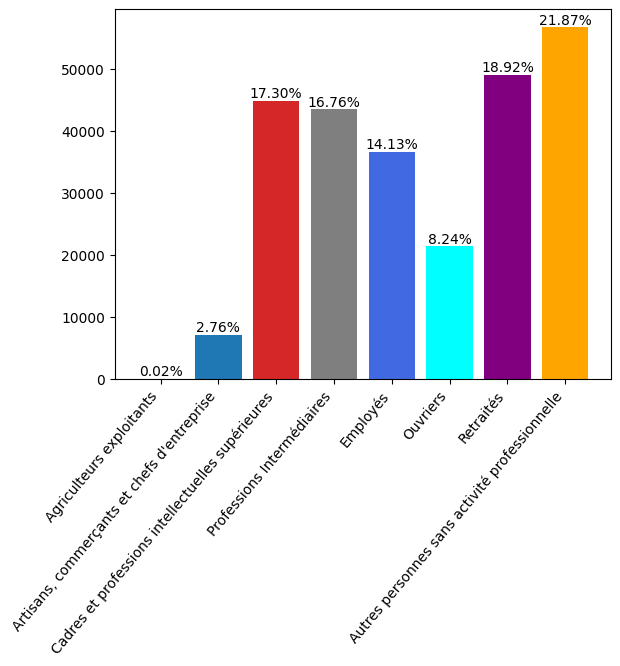

In [ ]:
CS1_8_labels = ["Agriculteurs exploitants", "Artisans, commerçants et chefs d'entreprise", "Cadres et professions intellectuelles supérieures",
            "Professions Intermédiaires", "Employés", "Ouvriers", "Retraités", "Autres personnes sans activité professionnelle"]

def chart_from_city(city, type="bar"):
    city_code = get_code_from_city(city)

    CS1_8_SEXE = get_local_data("CS1_8-SEXE", "GEO2020RP2017", nivgeo="COM", geocodes=[city_code])
    CS1_8 = CS1_8_SEXE[(CS1_8_SEXE["SEXE"] == "ENS") & (CS1_8_SEXE["CS1_8"] != "ENS")]


    sizes = CS1_8["OBS_VALUE"].tolist()

    fig, ax = plt.subplots()
    if type == "pie":
        ax.pie(sizes, labels=CS1_8_labels, autopct='%.2f%%')
    else:
        bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:grey', 'royalblue', 'cyan', 'purple', 'orange']
        ax.bar(CS1_8_labels, sizes, color=bar_colors)
        for container in ax.containers:
            print([x / sum(sizes) for x in sizes])
        ax.bar_label(container, [f'{x / sum(sizes):.2%}' for x in sizes])
        plt.xticks(rotation=50, ha='right')


chart_from_city("Nantes", type="bar")

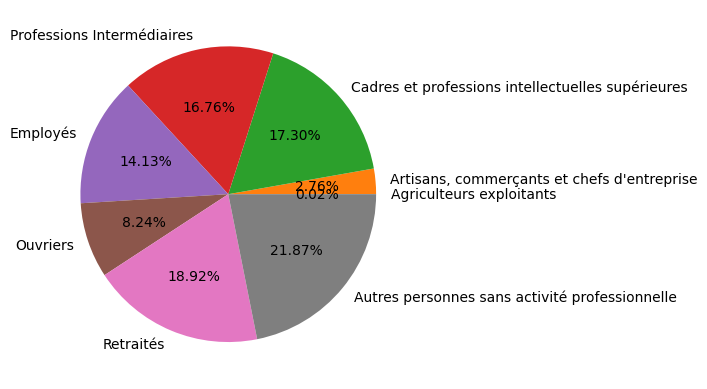

In [ ]:
chart_from_city("Nantes", type="pie")

#### Depuis le CSV

In [ ]:
import pandas as pd
df_pop = pd.read_csv('./TD_POP6_2021.csv', sep=';')
df_pop

/tmp/ipykernel_1092/498340986.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pop = pd.read_csv('./TD_POP6_2021.csv', sep=';')


,NIVGEO,CODGEO,LIBGEO,CS1_8,AGEQ65,SEXE,NB
0,COM,1001,L'Abergement-Clémenciat,1,55,1,4.843533
1,COM,1001,L'Abergement-Clémenciat,2,20,2,4.885812
2,COM,1001,L'Abergement-Clémenciat,2,30,1,4.928460
3,COM,1001,L'Abergement-Clémenciat,2,40,2,4.885812
4,COM,1001,L'Abergement-Clémenciat,2,45,1,4.885812
...,...,...,...,...,...,...,...
1744377,COM,97424,Cilaos,8,55,2,52.741769
1744378,COM,97424,Cilaos,8,60,1,42.928835
1744379,COM,97424,Cilaos,8,60,2,47.275343
1744380,COM,97424,Cilaos,8,65,1,26.096372


In [ ]:
df_pop.columns

Index(['NIVGEO', 'CODGEO', 'LIBGEO', 'CS1_8', 'AGEQ65', 'SEXE', 'NB'], dtype='object')

### Taux de pauvreté

In [ ]:
from pathlib import Path
import numpy as np

# revenu_path = Path('./indic-struct-distrib-revenu-2021-COMMUNES_csv')

# metas = pd.DataFrame(columns=['COD_MOD', 'COD_VAR', 'LIB_MOD', 'LIB_VAR', 'LIB_VAR_LONG', 'LONG_VAR', 'TYPE_VAR'])
# for f in revenu_path.iterdir():
#     if f.name.startswith("meta_FILO2021_DISP_PAUVRES_COM"):
#         meta = pd.concat([metas, pd.read_csv(f, sep=';')], axis=0)

meta = pd.read_csv('./indic-struct-distrib-revenu-2021-COMMUNES_csv/meta_FILO2021_DISP_PAUVRES_COM.csv', sep=';')
meta.reset_index(drop=True, inplace=True)
len(meta['COD_VAR'] == 'CODGEO')




35069

In [ ]:
meta['COD_VAR'].value_counts()

COD_VAR
CODGEO          34929
TP5021              1
TP6021              1
TP60Q221            1
TP4021              1
                ...  
OPR5TP60IP21        1
OPR6TP5021          1
OPR6TP6021          1
OPR6TP60Q221        1
OPR6TP60IP21        1
Name: count, Length: 141, dtype: int64

In [ ]:
print(get_label_from_code('TP4021'), meta)
print(get_label_from_code('TP60Q221'), meta)
print(get_label_from_code('TP60IP21'), meta)

Taux de pauvreté au seuil de 40% (%)
Médiane sur la sous-population pauvre au seuil de 60% (€)
Intensité de la pauvreté  au seuil de 60%


In [ ]:
disp_pauvres_com = pd.read_csv('indic-struct-distrib-revenu-2021-COMMUNES_csv/FILO2021_DISP_PAUVRES_COM.csv', sep=';', low_memory=False)
disp_pauvres_com

,CODGEO,TP4021,TP5021,TP6021,TP60Q221,TP60IP21,AGE1TP4021,AGE1TP5021,AGE1TP6021,AGE1TP60Q221,...,OPR5TP4021,OPR5TP5021,OPR5TP6021,OPR5TP60Q221,OPR5TP60IP21,OPR6TP4021,OPR6TP5021,OPR6TP6021,OPR6TP60Q221,OPR6TP60IP21
0,01001,s,s,s,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,01002,s,s,s,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
2,01004,"5,0","9,0","17,0",11290,"0,185",s,s,"17,0",10860,...,s,s,s,s,s,s,s,s,8660,"0,374"
3,01005,s,s,s,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
4,01006,s,s,s,s,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34924,97420,"11,0","23,0","34,0",10590,"0,235",s,"33,0","50,0",10970,...,s,s,s,s,s,"43,0","78,0",s,9450,"0,318"
34925,97421,"21,0","37,0","54,0",10120,"0,269",s,s,s,10460,...,s,s,s,s,s,"59,0",s,s,8180,"0,409"
34926,97422,"13,0","26,0","38,0",10470,"0,244","17,0","36,0","54,0",10720,...,"24,0","36,0","41,0",8450,"0,389","44,0","78,0","92,0",9320,"0,327"
34927,97423,"13,0","26,0","37,0",10490,"0,243",s,s,s,s,...,s,s,s,s,s,"57,0",s,s,8610,"0,379"


In [ ]:
for c in disp_pauvres_com.columns:
    print(f"{c}: {get_label_from_code(c, meta)}")

# Les codes qui nous intéressent : TP4021, TP5021 et TP6021 respectivement les taux de pauvreté aux seuils de 40%, 50% et 60% de la médiane des niveaux de vie

CODGEO: Code géographique
TP4021: Taux de pauvreté au seuil de 40% (%)
TP5021: Taux de pauvreté au seuil de 50% (%)
TP6021: Taux de pauvreté au seuil de 60% (%)
TP60Q221: Médiane sur la sous-population pauvre au seuil de 60% (€)
TP60IP21: Intensité de la pauvreté  au seuil de 60%
AGE1TP4021: Taux de pauvreté au seuil de 40% (%) - moins de 30 ans
AGE1TP5021: Taux de pauvreté au seuil de 50% (%) - moins de 30 ans
AGE1TP6021: Taux de pauvreté au seuil de 60% (%) - moins de 30 ans
AGE1TP60Q221: Médiane sur la sous-population pauvre au seuil de 60% (€) - moins de 30 ans
AGE1TP60IP21: Intensité de la pauvreté  au seuil de 60% - moins de 30 ans
AGE2TP4021: Taux de pauvreté au seuil de 40% (%) - de 30 à 39 ans
AGE2TP5021: Taux de pauvreté au seuil de 50% (%) - de 30 à 39 ans
AGE2TP6021: Taux de pauvreté au seuil de 60% (%) - de 30 à 39 ans
AGE2TP60Q221: Médiane sur la sous-population pauvre au seuil de 60% (€) - de 30 à 39 ans
AGE2TP60IP21: Intensité de la pauvreté  au seuil de 60% - de 30 à 3

33,0


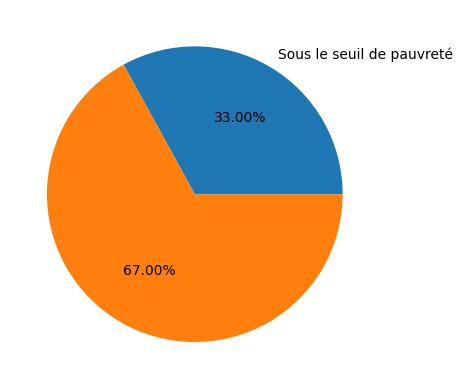

In [ ]:
def draw_poverty_pie(city, poverty_threshold=0.6):
    if poverty_threshold not in [0.4, 0.5, 0.6]:
        raise ValueError("poverty_threshold must be one of [0.4, 0.5, 0.6]")
    if poverty_threshold == 0.4:
        var_code = 'TP4021'
    elif poverty_threshold == 0.5:
        var_code = 'TP5021'
    else:
        var_code = 'TP6021'
    geo_code = get_code_from_city(city)
    
    poverty_rate = disp_pauvres_com[disp_pauvres_com['CODGEO'] == geo_code][var_code].iloc[0]
    print(poverty_rate)
    if poverty_rate == 's':
        print("Pas de données pour cette commune")
        return
    poverty_rate = float(poverty_rate.replace(',', '.'))

    fig, ax = plt.subplots()
    ax.pie([poverty_rate, 100 - poverty_rate], labels=["Sous le seuil de pauvreté", ""], autopct='%.2f%%')


draw_poverty_pie('Saint-Denis')


### Nombres de locataires

In [ ]:
meta_loc = pd.read_csv("base-cc-logement-2021_csv/meta_base-cc-logement-2021.CSV", sep=';')
meta_loc

,COD_VAR,LIB_VAR,LIB_VAR_LONG,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR
0,P21_LOG,Logements en 2021 (princ),Nombre de logements en 2021,NaN,NaN,NUM,16
1,P21_RP,Résidences principales en 2021 (princ),Nombre de résidences principales en 2021,NaN,NaN,NUM,16
2,P21_RSECOCC,Rés secondaires et logts occasionnels en 2021 ...,Nombre de résidences secondaires et logements ...,NaN,NaN,NUM,17
3,P21_LOGVAC,Logements vacants en 2021 (princ),Nombre de logements vacants en 2021,NaN,NaN,NUM,17
4,P21_MAISON,Maisons en 2021 (princ),Nombre de maisons en 2021,NaN,NaN,NUM,16
...,...,...,...,...,...,...,...
35197,CODGEO,Code commune,Code commune,97420,Sainte-Suzanne,CHAR,5
35198,CODGEO,Code commune,Code commune,97421,Salazie,CHAR,5
35199,CODGEO,Code commune,Code commune,97422,Le Tampon,CHAR,5
35200,CODGEO,Code commune,Code commune,97423,Les Trois-Bassins,CHAR,5


In [ ]:
loc = pd.read_csv("base-cc-logement-2021_csv/base-cc-logement-2021.CSV", sep=';')
loc

/tmp/ipykernel_1092/1779627292.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  loc = pd.read_csv("base-cc-logement-2021_csv/base-cc-logement-2021.CSV", sep=';')


,CODGEO,P21_LOG,P21_RP,P21_RSECOCC,P21_LOGVAC,P21_MAISON,P21_APPART,P21_RP_1P,P21_RP_2P,P21_RP_3P,...,P10_RP_CLIM,P10_RP_TTEGOU,P10_RP_GARL,P10_RP_VOIT1P,P10_RP_VOIT1,P10_RP_VOIT2P,P10_RP_HABFOR,P10_RP_CASE,P10_RP_MIBOIS,P10_RP_MIDUR
0,1001,372.387494,341.234562,13.707290,17.445642,362.548322,8.593055,0.000000,7.624421,29.703998,...,NaN,NaN,260.328205,292.492308,114.584615,177.907692,NaN,NaN,NaN,NaN
1,1002,174.938672,115.722510,44.960419,14.255743,173.099573,1.839099,0.919549,1.897227,13.016784,...,NaN,NaN,70.833333,90.666667,27.388889,63.277778,NaN,NaN,NaN,NaN
2,1004,7846.021789,6932.839198,137.979344,775.203248,3281.352059,4488.259433,322.522630,820.025148,1789.273108,...,NaN,NaN,4099.522125,4998.076097,2974.290162,2023.785935,NaN,NaN,NaN,NaN
3,1005,898.442947,794.753025,7.560724,96.129199,660.199129,234.958104,6.693646,54.231271,108.867662,...,NaN,NaN,512.000000,571.000000,208.000000,363.000000,NaN,NaN,NaN,NaN
4,1006,73.027778,56.500000,9.444444,7.083333,69.864766,3.163012,0.000000,0.991228,5.947368,...,NaN,NaN,36.250000,48.678571,21.750000,26.928571,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34958,97420,9630.185920,8981.620244,65.618856,582.946821,7235.998562,2328.445931,136.158319,703.594759,1968.921618,...,1209.846378,3556.893383,4542.306449,5035.084207,3300.987012,1734.097194,60.094063,665.278884,252.847533,6297.787628
34959,97421,3343.130300,2652.941981,207.263759,482.924560,3229.393971,66.457431,24.676874,105.521381,427.213087,...,9.138133,41.230960,1652.822340,1481.735995,1111.272311,370.463684,16.583921,294.698747,468.616044,1586.101287
34960,97422,36635.282575,33552.672737,1036.426767,2046.183071,27892.398699,8500.741033,1959.042763,3292.390082,6970.684235,...,889.266315,5699.777283,22017.590068,20317.387055,13914.962189,6402.424866,206.444504,1269.201052,1107.713641,24559.946009
34961,97423,3094.773652,2637.658348,82.744934,374.370370,2826.133802,233.894362,41.525199,170.524041,539.964670,...,147.000000,203.000000,1571.000000,1560.000000,1009.000000,551.000000,19.000000,285.000000,129.000000,1891.000000


#### La colonne GEOCODE est composée de données de type string et int

In [ ]:
print("Types de la colonne GEOCODE :")
print(pd.Series([type(cg) for cg in loc["CODGEO"]]).value_counts())
print("\nType des GEOCODE dans le fichier meta :")
print(pd.Series([type(cg) for cg in meta_loc[meta_loc["COD_VAR"] == "CODGEO"]["COD_MOD"]]).value_counts())


Types de la colonne GEOCODE :
<class 'int'>    30867
<class 'str'>     4096
Name: count, dtype: int64

Type des GEOCODE dans le fichier meta :
<class 'str'>    34963
Name: count, dtype: int64


#### Les GEOCODE du fichier de données ne sont pas tous de tailles égales contrairement au fichier méta
(Pas de zéro devant pour les départements à un chiffre)

In [ ]:
print(meta_loc[meta_loc["COD_VAR"] == "CODGEO"]["COD_MOD"][:10])
print(loc["CODGEO"][:10])

239    01001
240    01002
241    01004
242    01005
243    01006
244    01007
245    01008
246    01009
247    01010
248    01011
Name: COD_MOD, dtype: object
0    1001
1    1002
2    1004
3    1005
4    1006
5    1007
6    1008
7    1009
8    1010
9    1011
Name: CODGEO, dtype: object


Conversion de la colonne GEOCODE en string et ajout du zéro si besoin

In [ ]:
loc["CODGEO"] = loc["CODGEO"].apply(lambda x: f"0{x}" if len(f"{x}") == 4 else x).astype('string')

In [ ]:
for c in loc.columns:
    print(f"{c}: {get_label_from_code(c, meta_loc)}")

CODGEO: Code commune
P21_LOG: Logements en 2021 (princ)
P21_RP: Résidences principales en 2021 (princ)
P21_RSECOCC: Rés secondaires et logts occasionnels en 2021 (princ)
P21_LOGVAC: Logements vacants en 2021 (princ)
P21_MAISON: Maisons en 2021 (princ)
P21_APPART: Appartements en 2021 (princ)
P21_RP_1P: Rés princ 1 pièce en 2021 (princ)
P21_RP_2P: Rés princ 2 pièces en 2021 (princ)
P21_RP_3P: Rés princ 3 pièces en 2021 (princ)
P21_RP_4P: Rés princ 4 pièces en 2021 (princ)
P21_RP_5PP: Rés princ 5 pièces ou plus en 2021 (princ)
P21_NBPI_RP: Pièces rés princ en 2021 (princ)
P21_RPMAISON: Rés princ type maison en 2021 (princ)
P21_NBPI_RPMAISON: Pièces rés princ type maison en 2021 (princ)
P21_RPAPPART: Rés princ type appartement en 2021 (princ)
P21_NBPI_RPAPPART: Pièces rés princ type appartement en 2021 (princ)
C21_RP_HSTU1P: Rés princ hors studio de 1 personne en 2021 (compl)
C21_RP_HSTU1P_SUROCC: Rés princ hors studio de 1 personne en suroccupation en 2021 (compl)
P21_RP_ACHTOT: Rés prin

In [ ]:
loc[['P21_RP_LOC', 'CODGEO']]

,P21_RP_LOC,CODGEO
0,47.132555,1001
1,11.385196,1002
2,3913.534700,1004
3,199.092414,1005
4,14.868421,1006
...,...,...
34958,3629.901754,97420
34959,489.903591,97421
34960,14766.771740,97422
34961,555.455110,97423


91512.727210689 173469.808081051


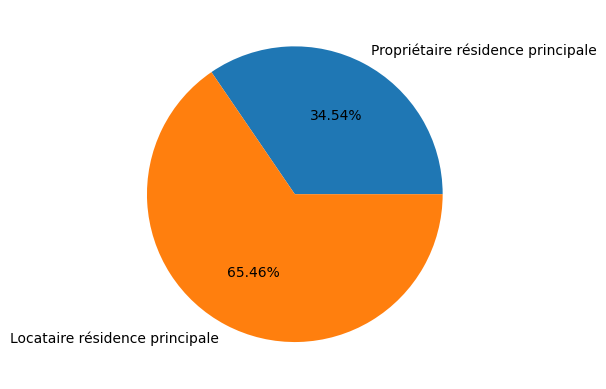

In [ ]:
def draw_nb_loc_pie(city):
    geo_code = get_code_from_city(city)

    loc_city = loc[loc['CODGEO'] == geo_code]

    pro_log_rp = loc_city['P21_RP_PROP'].iloc[0]
    loc_log_rp = loc_city['P21_RP_LOC'].iloc[0]

    print(pro_log_rp, loc_log_rp)
    fig, ax = plt.subplots()
    ax.pie([pro_log_rp, loc_log_rp], labels=["Propriétaire résidence principale", "Locataire résidence principale"], autopct='%.2f%%')

draw_nb_loc_pie('Lyon')